# Snow Pillows

#### Uploads daily snow pillows data for TUM, SLI, DAN sites.

http://cdec.water.ca.gov/dynamicapp/selectQuery

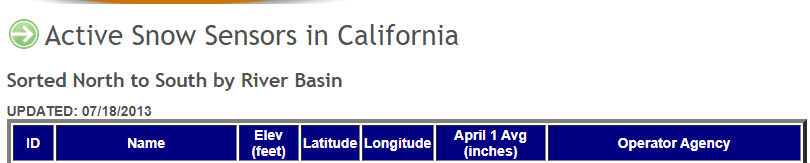

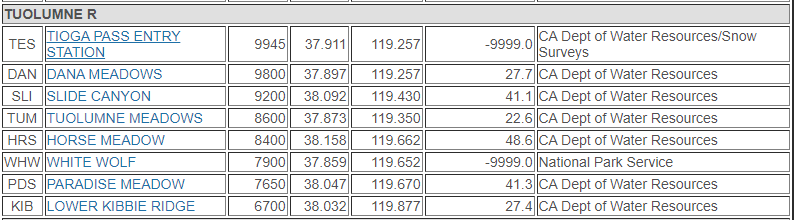

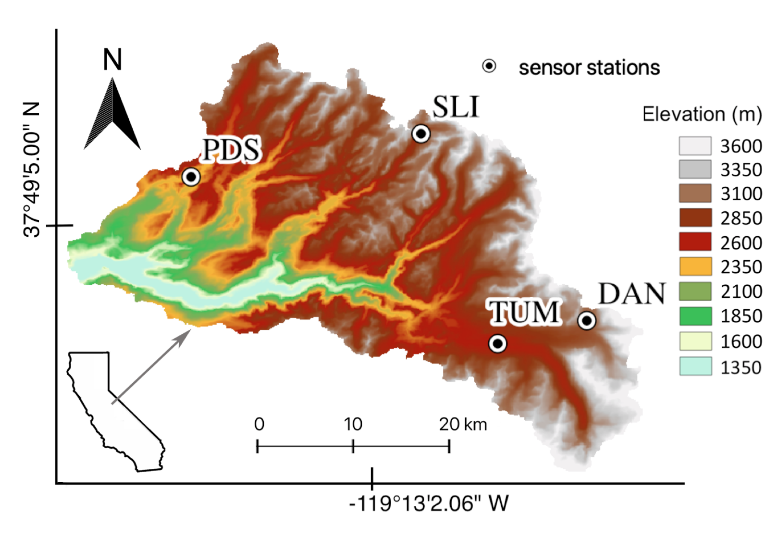

https://www.mdpi.com/2306-5338/7/3/46/htm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import rasterio as rio
import matplotlib.dates as mdates
import geopandas as gpd
from datetime import date
from datetime import datetime

In [2]:
### Import Data and Clean

In [3]:
# Import data files from excel
snow_pillow_fp = 'data/Sites_All.csv'
snow_pillow = pd.read_csv(snow_pillow_fp)
snow_pillow.head()

,DateTime,TUM_in,SLI_in,DAN_in,TUM_m,SLI_m,DAN_m
0,11/1/2019,-1,0.0,0.0,-0.0254,0.0,0.0
1,11/2/2019,0,0.0,0.0,0.0000,0.0,0.0
2,11/3/2019,0,0.0,NaN,0.0000,0.0,NaN
3,11/4/2019,1,0.0,0.0,0.0254,0.0,0.0
4,11/5/2019,1,0.0,0.0,0.0254,0.0,0.0


In [4]:
#snow_pillow.dtypes

In [5]:
snow_pillow["DateTime_fmt"]= pd.to_datetime(snow_pillow["DateTime"])
#snow_pillow.head()

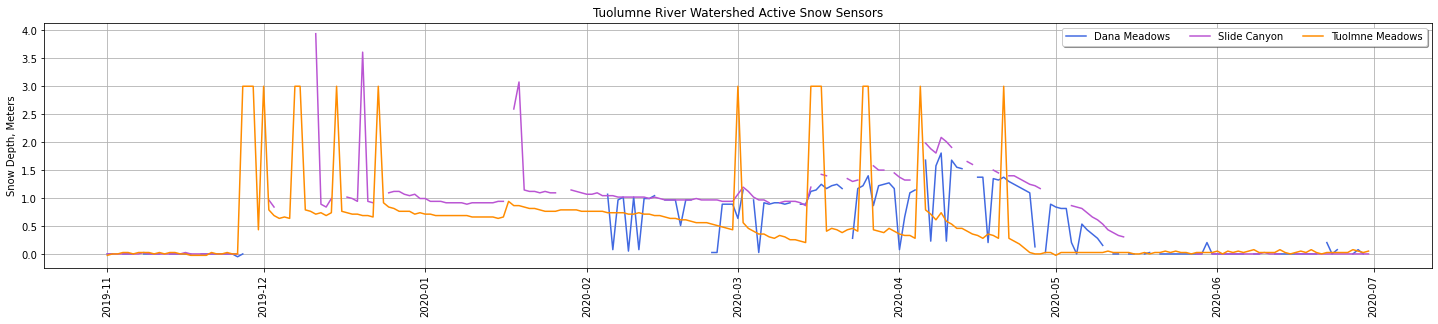

In [6]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(20,4))
fig.tight_layout()

ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['DAN_m'], color='royalblue', markersize = 0 , linestyle = '-', label='Dana Meadows');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['SLI_m'], color='mediumorchid', markersize = 0, linestyle = '-', label='Slide Canyon');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['TUM_m'], color='darkorange', markersize = 0, linestyle = '-', label='Tuolmne Meadows');

ax.legend(loc='upper right', fancybox=True, shadow=True, ncol=5)

plt.grid()
ax.set_ylabel('Snow Depth, Meters');
ax.set_title('Tuolumne River Watershed Active Snow Sensors');
plt.xticks(rotation = 'vertical');
ax.xaxis.set_major_locator(mdates.MonthLocator())

### Geodata

In [7]:
# Import site locations file from excel
sp_sites = 'data/SnowPillows_TUOLUMNE.csv'

sp_df = pd.read_csv(sp_sites)
crs = {'init':'epsg:32611'}

sp_df.head()

,ID,Name,Elev (feet),Latitude,Longitude,April 1 Avg (inches),Operator Agency
0,TES,TIOGA PASS ENTRY STATION,9945,37.911,119.257,-9999.0,CA Dept of Water Resources/Snow Surveys
1,DAN,DANA MEADOWS,9800,37.897,119.257,27.7,CA Dept of Water Resources
2,SLI,SLIDE CANYON,9200,38.092,119.430,41.1,CA Dept of Water Resources
3,TUM,TUOLUMNE MEADOWS,8600,37.873,119.350,22.6,CA Dept of Water Resources
4,HRS,HORSE MEADOW,8400,38.158,119.662,48.6,CA Dept of Water Resources


In [8]:
# Map points
sp_geometry = [Point(xy) for xy in zip(sp_df["Longitude"], sp_df["Latitude"])]
sp_geometry[:3]

In [9]:
sp_geo_df = gpd.GeoDataFrame(sp_df, crs=crs, geometry = sp_geometry)
sp_geo_df.head()

/srv/conda/envs/notebook/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,ID,Name,Elev (feet),Latitude,Longitude,April 1 Avg (inches),Operator Agency,geometry
0,TES,TIOGA PASS ENTRY STATION,9945,37.911,119.257,-9999.0,CA Dept of Water Resources/Snow Surveys,POINT (119.25700 37.91100)
1,DAN,DANA MEADOWS,9800,37.897,119.257,27.7,CA Dept of Water Resources,POINT (119.25700 37.89700)
2,SLI,SLIDE CANYON,9200,38.092,119.430,41.1,CA Dept of Water Resources,POINT (119.43000 38.09200)
3,TUM,TUOLUMNE MEADOWS,8600,37.873,119.350,22.6,CA Dept of Water Resources,POINT (119.35000 37.87300)
4,HRS,HORSE MEADOW,8400,38.158,119.662,48.6,CA Dept of Water Resources,POINT (119.66200 38.15800)


In [10]:
#Plot
#hs_fn = 'data/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_gdaldem_hs.tif'
#src_hs = rio.open(hs_fn)
#hs = src_hs.read()
#hs[hs == (-9999.)] = np.nan
#hs[hs == (-0.)] = np.nan
#src_hs.close

#Plot full range
#f,ax = plt.subplots();
#plt.imshow(hs.squeeze(), cmap='gray');
#plt.colorbar();
#ax.set_title('Hillshade');
#ax.add_artist(ScaleBar(1));
#sp_geo_df.plot(ax=ax, markersize = 5, color = 'red');

In [11]:
#UpperTuolRiverBasinOutline.shp
#tuol_basin_fn = os.path.join('data','UpperTuolRiverBasin','UpperTuolRiverBasinOutline.shp')
#tuol_basin = gpd.read_file(tuol_basin_fn)

#os.chdir(os.path.join(et.io.HOME,'ICESat-2_Snowdepth'))

### Snow-On

In [12]:
# Import data files from excel
winter_2020_fp = 'data/winter_2020_difference_date.csv'
winter_2020 = pd.read_csv(winter_2020_fp)
winter_2020.head()

,Unnamed: 0,geometry,Track,Unnamed: 0.1,Unnamed: 0.1.1,date,dem_h,h_te_max,h_te_mean,h_te_median,...,latitude,longitude,n_te_photons,segment_snowcover,terrain_slope,x,y,h_aso,slope_aso,difference
0,0,POINT (296110.0791624115 4200924.17812425),gt1r,174,174.0,02/05/2020,3190.208252,3152.922852,3123.977783,3124.115479,...,37.933041,-119.320015,211.0,1.0,-0.467523,296110.079162,4.200924e+06,3124.627441,NaN,-0.511963
1,1,POINT (296096.2014315608 4200824.979677469),gt1r,175,175.0,02/05/2020,3133.827393,3103.147217,3087.289062,3087.147461,...,37.932144,-119.320145,417.0,1.0,-0.291937,296096.201432,4.200825e+06,3087.254883,20.547213,-0.107422
2,2,POINT (296082.983529917 4200725.341222636),gt1r,176,176.0,02/05/2020,3086.844971,3074.830078,3065.325439,3064.654053,...,37.931244,-119.320267,447.0,1.0,-0.178536,296082.983530,4.200725e+06,3064.038818,12.650502,0.615234
3,3,POINT (296069.7759606871 4200626.126119612),gt1r,177,177.0,02/05/2020,3065.124512,3057.640625,3049.267578,3048.199707,...,37.930347,-119.320389,537.0,1.0,-0.076852,296069.775961,4.200626e+06,3048.850098,7.090505,-0.650391
4,4,POINT (296057.8988700601 4200526.454301283),gt1r,178,178.0,02/05/2020,3055.509521,3047.717773,3041.521973,3040.587891,...,37.929447,-119.320496,532.0,1.0,-0.099972,296057.898870,4.200526e+06,3040.695068,7.160444,-0.107178


In [13]:
#winter_2020.dtypes

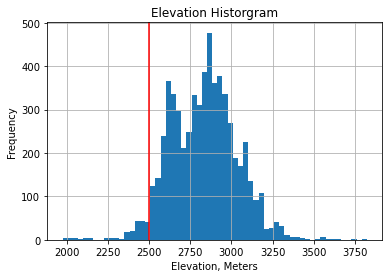

In [14]:
fig, ax = plt.subplots()
ax.hist(winter_2020['h_aso'], bins='auto');
plt.grid();
plt.axvline(x=2500, color = 'red');
ax.set_title('Elevation Historgram');
ax.set_xlabel('Elevation, Meters');
ax.set_ylabel('Frequency');

In [15]:
type(winter_2020)

pandas.core.frame.DataFrame

In [16]:
#Fix date formatting
winter_2020["DateTime"]= pd.to_datetime(winter_2020["date"])
#winter_2020.head()

In [17]:
winter_2020_emask = winter_2020.where(winter_2020.h_aso > 2500)
#winter_2020_emask.head()

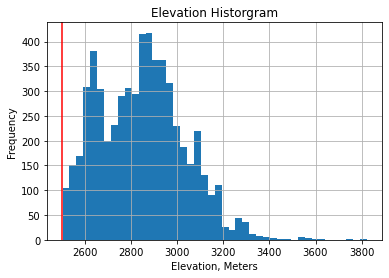

In [18]:
#Gutcheck
fig, ax = plt.subplots()
ax.hist(winter_2020_emask['h_aso'], bins='auto');
plt.grid();
plt.axvline(x=2500, color = 'red');
ax.set_title('Elevation Historgram');
ax.set_xlabel('Elevation, Meters');
ax.set_ylabel('Frequency');

In [19]:
#Plot ICE-SAT2 Points
#fig, ax = plt.subplots(figsize=(20,4))
#ax.plot(winter_2020['date'], winter_2020['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
#ax.set_title('ICE-Sat2 Snow Depth from ASO Snow Off');
#plt.grid()

In [20]:
#Plot ICE-SAT2 Points
#fig, ax = plt.subplots(figsize=(20,4))
#ax.plot(winter_2020['DateTime'], winter_2020['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
#ax.set_title('ICE-Sat2 Snow Depth from ASO Snow Off');
#plt.grid()

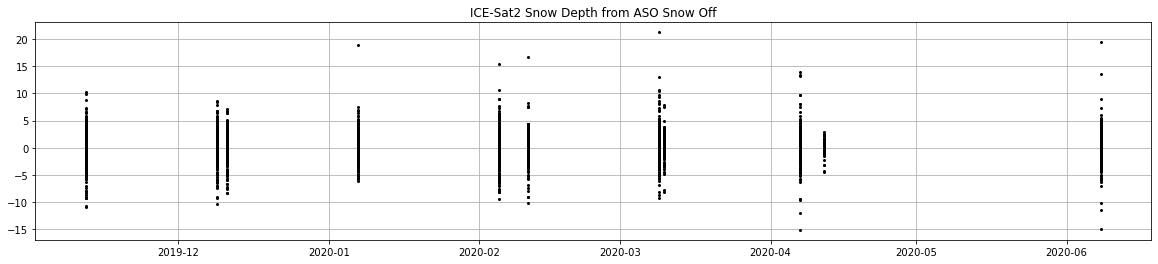

In [21]:
#Plot ICE-SAT2 Points
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(winter_2020_emask['DateTime'], winter_2020_emask['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
ax.set_title('ICE-Sat2 Snow Depth from ASO Snow Off');
plt.grid()

In [22]:
#winter_2020_emask.dtypes

In [23]:
#Plot Masked ICE-SAT2 Points
#fig, ax = plt.subplots(figsize=(20,4))
#ax.plot(winter_2020_emask['date'], winter_2020_emask['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
#ax.set_title('ICE-Sat2 Snow Depth from ASO Snow Off, Masked to Elevations above 2,500m');
#plt.grid()

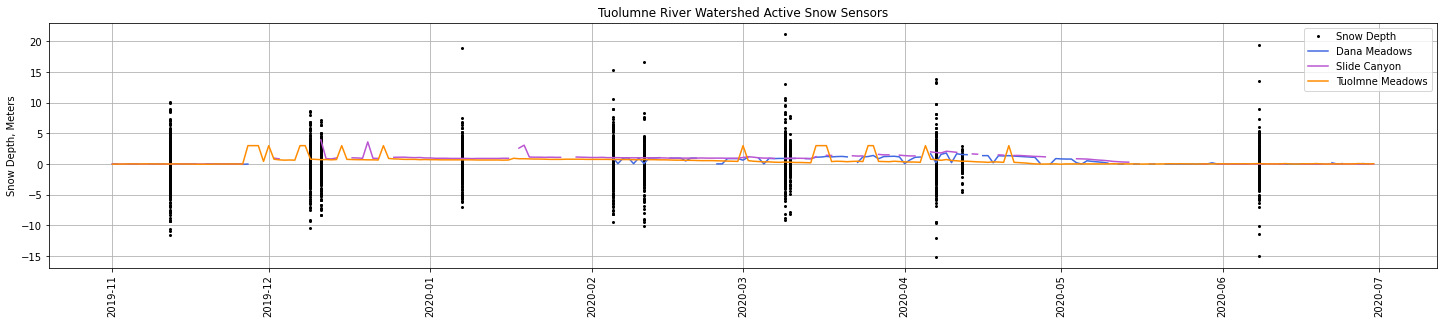

In [24]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(20,4))
fig.tight_layout()

ax.plot(winter_2020['DateTime'], winter_2020['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['DAN_m'], color='royalblue', markersize = 0 , linestyle = '-', label='Dana Meadows');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['SLI_m'], color='mediumorchid', markersize = 0, linestyle = '-', label='Slide Canyon');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['TUM_m'], color='darkorange', markersize = 0, linestyle = '-', label='Tuolmne Meadows');

plt.grid()
ax.set_ylabel('Snow Depth, Meters');
ax.set_title('Tuolumne River Watershed Active Snow Sensors');
plt.xticks(rotation = 'vertical');
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())

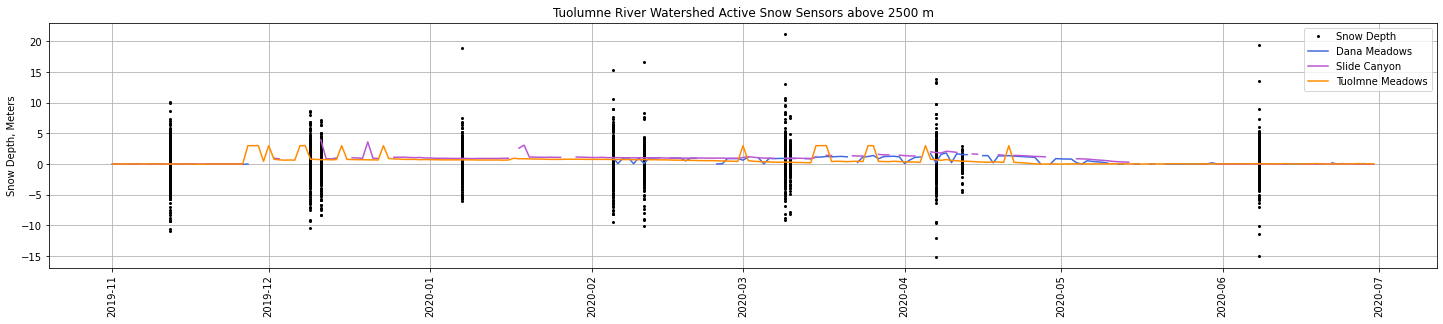

In [25]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(20,4))
fig.tight_layout()

ax.plot(winter_2020_emask['DateTime'], winter_2020_emask['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['DAN_m'], color='royalblue', markersize = 0 , linestyle = '-', label='Dana Meadows');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['SLI_m'], color='mediumorchid', markersize = 0, linestyle = '-', label='Slide Canyon');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['TUM_m'], color='darkorange', markersize = 0, linestyle = '-', label='Tuolmne Meadows');

plt.grid()
ax.set_ylabel('Snow Depth, Meters');
ax.set_title('Tuolumne River Watershed Active Snow Sensors above 2500 m');
plt.xticks(rotation = 'vertical');
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())

In [26]:
doy_stats = winter_2020_emask.groupby('DateTime').agg('median')['difference']
doy_stats

DateTime
2019-11-12    0.214844
2019-12-09    0.326050
2019-12-11    0.152466
2020-01-07    0.511841
2020-02-05    0.228760
2020-02-11    0.123291
2020-03-09    0.407471
2020-03-10    0.207275
2020-04-07    0.269653
2020-04-12    0.306885
2020-06-08    0.404297
Name: difference, dtype: float64

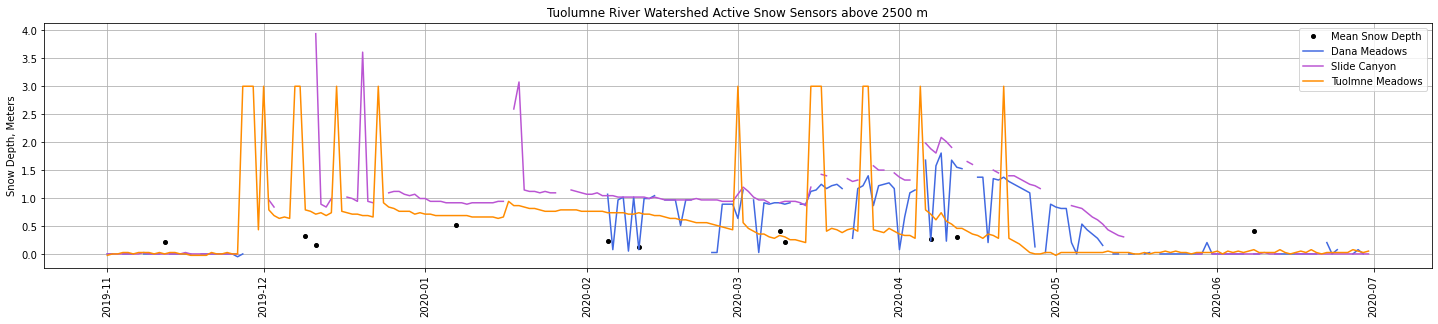

In [27]:
# A Plot Data (https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)
fig, ax = plt.subplots(figsize=(20,4))
fig.tight_layout()

ax.plot(doy_stats, 'o', color='black', markersize = 4, linestyle = 'none', label='Mean Snow Depth');
#ax.plot(winter_2020_emask['DateTime'], winter_2020_emask['difference'], 'o', color='black', markersize = 2, linestyle = 'none', label='Snow Depth');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['DAN_m'], color='royalblue', markersize = 0 , linestyle = '-', label='Dana Meadows');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['SLI_m'], color='mediumorchid', markersize = 0, linestyle = '-', label='Slide Canyon');
ax.plot(snow_pillow['DateTime_fmt'], snow_pillow['TUM_m'], color='darkorange', markersize = 0, linestyle = '-', label='Tuolmne Meadows');

plt.grid()
ax.set_ylabel('Snow Depth, Meters');
ax.set_title('Tuolumne River Watershed Active Snow Sensors above 2500 m');
plt.xticks(rotation = 'vertical');
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.savefig('fINALFig.png')